when we have not normal data and we have to convert to normal then we use function transformer

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
dataset=pd.read_csv("../loan.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\Sweta Kumari\AppData\Local\Temp\ipykernel_29300\2328021184.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

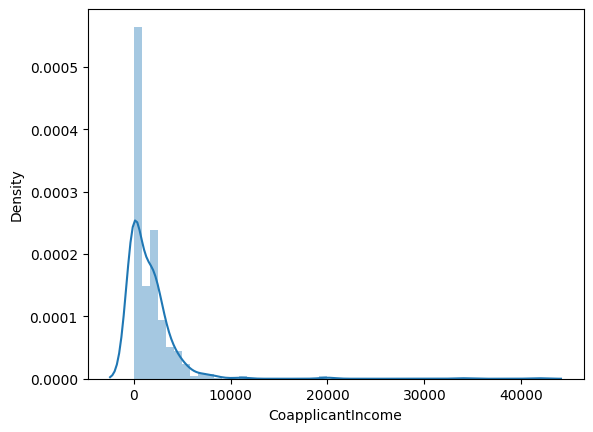

In [24]:
sns.distplot(dataset["CoapplicantIncome"])

as we can se graph is not normal so we have to transform it nut first we have to remove outliers
                              ----------

In [25]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
iqr=q3-q1


In [26]:
min_r=q1-(1.5*iqr)
max_r=q3+(1.5*iqr)
min_r,max_r

(np.float64(-3445.875), np.float64(5743.125))

In [27]:
dataset=dataset[dataset["CoapplicantIncome"]<=max_r]

C:\Users\Sweta Kumari\AppData\Local\Temp\ipykernel_29300\2328021184.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

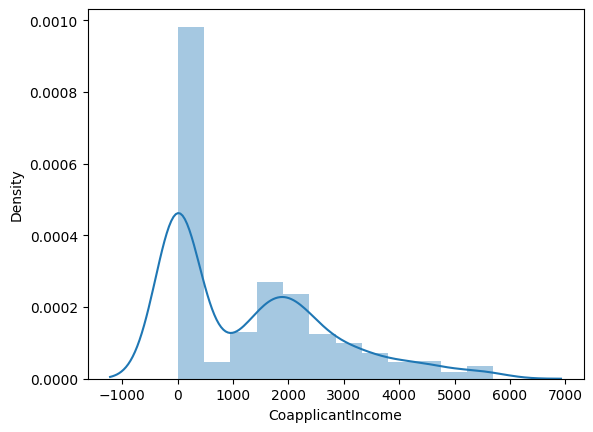

In [28]:
sns.distplot(dataset["CoapplicantIncome"])

here we have removed outliers but due to that data is converted in to a non normal distribution.hence we will function transformation now

In [29]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
ft = FunctionTransformer(func=np.log1p)# we can use X**2 as well
ft.fit(dataset[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [34]:
dataset["CoapplicantIncome_tf"]=ft.transform(dataset[["CoapplicantIncome"]])

C:\Users\Sweta Kumari\AppData\Local\Temp\ipykernel_29300\344308209.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_tf"])


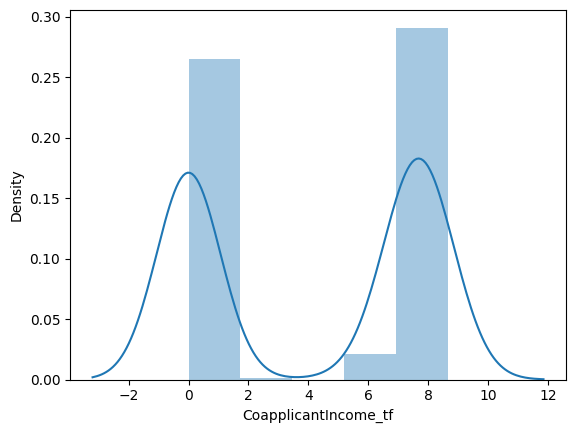

In [35]:
sns.distplot(dataset["CoapplicantIncome_tf"])
plt.show()

when we have important data in outlier then withouth removing them we can use function transformation to use that data